# Data Cleaning and Consistency Checks

# Glossary
## 1. Importing Libraries
## 2. Importing Files
## 3. Describing Dataset
## 4. Consistency Checks
##### 4.1 Missing Data
##### 4.2 Duplicates
##### 4.3 Data Types
## 5. Data Cleaning
## 6. Descriptive Statistics
##### 6.1 Descriptive analysis pre-dropping all collums with NaN
##### 6.2 Descriptive analysis after dropping all collums with NaN
##### 6.3 Descriptive analysis for the qualitative columns without missing values
## 7. Inspecting Outliers
## 8. Saving Final files

## 1. Importing Libraries

In [1]:
# Importing necessary libraries for importing, analyzing and cleaning data
import numpy as np
import pandas as pd
import os

## 2. Importing Files

In [2]:
#creating list of columns to import from the orders file. The original file has 96 columns and we are only interested in 40 of them
vars_list = ['id', 'host_id', 'host_since', 'host_response_time', 'host_response_rate','host_is_superhost','neighbourhood_cleansed','host_listings_count','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds',	'bed_type',	'amenities','square_feet','price','weekly_price','monthly_price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','has_availability','availability_30','availability_60','availability_90','availability_365','number_of_reviews','first_review','last_review','review_scores_rating','cancellation_policy','calculated_host_listings_count','reviews_per_month']

In [3]:
# Creating path variable for easier importing/exporting
path = r'C:\Users\Nuno\05-2024 AirBnB Amsterdam Analysis'
#Importing part of the listings_details file
df_listings_details = pd.read_csv(os.path.join(path,'02 Data','Original Data','listings_details.csv'),usecols=vars_list,index_col=False)

## 3. Describing Dataset

In [4]:
#Checking shape of the dataframe
df_listings_details.shape

(20030, 40)

In [5]:
#Checking import
df_listings_details.head()

,id,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,neighbourhood_cleansed,latitude,longitude,...,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,cancellation_policy,calculated_host_listings_count,reviews_per_month
0,2818,3159,2008-09-24,within an hour,100%,t,1.0,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,...,44,44,44,248,2009-03-30,2018-11-28,97.0,strict_14_with_grace_period,1,2.10
1,3209,3806,2008-10-24,within an hour,100%,f,1.0,Westerpark,52.390225,4.873924,...,0,0,47,42,2015-07-31,2018-08-29,96.0,moderate,1,1.03
2,20168,59484,2009-12-02,within a few hours,100%,f,2.0,Centrum-Oost,52.365087,4.893541,...,7,24,198,233,2010-03-02,2018-11-30,87.0,strict_14_with_grace_period,2,2.18
3,25428,56142,2009-11-20,within a few hours,100%,f,2.0,Centrum-West,52.373114,4.883668,...,32,44,141,1,2018-01-21,2018-01-21,100.0,strict_14_with_grace_period,2,0.09
4,27886,97647,2010-03-23,within an hour,100%,t,1.0,Centrum-West,52.386727,4.892078,...,37,54,199,171,2012-01-09,2018-11-25,99.0,strict_14_with_grace_period,1,2.03


In [6]:
# Type of every column
df_listings_details.dtypes

id                                  int64
host_id                             int64
host_since                         object
host_response_time                 object
host_response_rate                 object
host_is_superhost                  object
host_listings_count               float64
neighbourhood_cleansed             object
latitude                          float64
longitude                         float64
property_type                      object
room_type                          object
accommodates                        int64
bathrooms                         float64
bedrooms                          float64
beds                              float64
bed_type                           object
amenities                          object
square_feet                       float64
price                              object
weekly_price                       object
monthly_price                      object
security_deposit                   object
cleaning_fee                      

## 4. Consistency Checks

### 4.1 Missing Data

In [7]:
# Looking for Missing Values
df_listings_details.isnull().sum()

id                                    0
host_id                               0
host_since                            4
host_response_time                 9483
host_response_rate                 9483
host_is_superhost                     4
host_listings_count                   4
neighbourhood_cleansed                0
latitude                              0
longitude                             0
property_type                         0
room_type                             0
accommodates                          0
bathrooms                            10
bedrooms                              8
beds                                  7
bed_type                              0
amenities                             0
square_feet                       19624
price                                 0
weekly_price                      17187
monthly_price                     18469
security_deposit                   6166
cleaning_fee                       3629
guests_included                       0


### 4.2 Duplicate Values

In [8]:
# Looking for duplicate values
df_listings_details.duplicated().sum()

0

### 4.3 Data Types

In [9]:
#print columns with mixed data types
cols_mixed = []
for col in df_listings_details.columns.tolist():
  weird = (df_listings_details[[col]].map(type) != df_listings_details[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_listings_details[weird]) > 0:
    cols_mixed.append(col)
    print (col)

host_since
host_response_time
host_response_rate
host_is_superhost
weekly_price
monthly_price
security_deposit
cleaning_fee
first_review
last_review


In [10]:
# Check the type of mixed type columns
df_listings_details[cols_mixed].dtypes

host_since            object
host_response_time    object
host_response_rate    object
host_is_superhost     object
weekly_price          object
monthly_price         object
security_deposit      object
cleaning_fee          object
first_review          object
last_review           object
dtype: object

In [11]:
#uniformizing type of collumns as string to remove currency sign, and then converting to numeric, with text entries becoming nulls
def modify_fees(s):
    modified = s[1:]
    return pd.to_numeric(modified,errors='coerce')
    
df_listings_details[['cleaning_fee','security_deposit']] = df_listings_details[['cleaning_fee','security_deposit']].astype('str')    
df_listings_details['cleaning_fee_num'] = df_listings_details['cleaning_fee'].apply(modify_fees)
df_listings_details['security_deposit_num'] = df_listings_details['security_deposit'].apply(modify_fees)
df_listings_details['price'] = df_listings_details['price'].apply(modify_fees)
df_listings_details['extra_people'] = df_listings_details['extra_people'].apply(modify_fees)

In [12]:
#checking type of converted columns
df_listings_details[['cleaning_fee_num','security_deposit_num','price','extra_people']].dtypes

cleaning_fee_num        float64
security_deposit_num    float64
price                   float64
extra_people            float64
dtype: object

In [13]:
#Checking price columns for values coerced into NaN
df_listings_details['price'].isnull().sum()

28

In [14]:
#Dropping NaN values
df_listings_details.dropna(subset='price',inplace=True)

In [15]:
#Checking extra_people columns for values coerced into NaN
df_listings_details['extra_people'].isnull().sum()

0

In [16]:
#removing % from the response rate column in preparation for conversion to numerical
def modify_response_rate(s):
    modified = s[:-1]
    return pd.to_numeric(modified,errors='coerce')
df_listings_details['host_response_rate'] = df_listings_details['host_response_rate'].astype('str')
df_listings_details['host_response_rate'] = df_listings_details['host_response_rate'].apply(modify_response_rate)

In [17]:
# Converting several columns into objects
df_listings_details[['host_since','host_response_time','host_is_superhost','first_review','last_review']] = df_listings_details[['host_since','host_response_time','host_is_superhost','first_review','last_review']].astype('str')

In [18]:
#Check columns with mixed data types after cleaning
cols_mixed = []
for col in df_listings_details.columns.tolist():
  weird = (df_listings_details[[col]].map(type) != df_listings_details[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_listings_details[weird]) > 0:
    cols_mixed.append(col)
    print (col)

weekly_price
monthly_price


The two collumns above will be removed from the dataset due to a majority being missing values, so we do not need to clean them.

## 5. Data Cleaning

In [19]:
'''
Let's start by dropping the columns that have too many missing values to be of any use to our analysis, namely:
square_feet                       19624
weekly_price                      17187
monthly_price                     18469
'''
df_listings_details.drop(['square_feet','weekly_price','monthly_price'],inplace=True,axis=1)

In [20]:
#dropping NaN entries of columns with under 10 NaN entries
df_listings_details.dropna(subset=['host_listings_count', 'bathrooms','bedrooms','beds'], inplace=True)

In [21]:
#Dropping incorrectly formatted cleaning_fee and security_deposit columns
df_listings_details.drop(['cleaning_fee','security_deposit'],inplace=True,axis=1)

In [22]:
#Checking if the correct columns were dropped
df_listings_details.columns

Index(['id', 'host_id', 'host_since', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_listings_count',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'cancellation_policy',
       'calculated_host_listings_count', 'reviews_per_month',
       'cleaning_fee_num', 'security_deposit_num'],
      dtype='object')

In [23]:
#Checking for NaN values changed to nan during forced object typing change
(df_listings_details == 'nan').sum()

id                                   0
host_id                              0
host_since                           0
host_response_time                9452
host_response_rate                   0
host_is_superhost                    0
host_listings_count                  0
neighbourhood_cleansed               0
latitude                             0
longitude                            0
property_type                        0
room_type                            0
accommodates                         0
bathrooms                            0
bedrooms                             0
beds                                 0
bed_type                             0
amenities                            0
price                                0
guests_included                      0
extra_people                         0
minimum_nights                       0
maximum_nights                       0
has_availability                     0
availability_30                      0
availability_60          

In [24]:
#Checking if the nan entries are the same for both review columns
#By comparing the length of the dataframe where both are 'nan' with the number of 'nan' values
len(df_listings_details[(df_listings_details['last_review'] == 'nan')&(df_listings_details['first_review'] == 'nan')]) == 2392

True

This confirms that both values are only null simultaneously. If we want to do further analysis involving these variables and how they affect other variables then we should branch off a dataset containing all the entries where the values are non-null. I will do this at a later point in the project, when the original dataset is cleaner.

In [25]:
# Making separate dataset with no nulls for the first and last review columns
df_first_last_review_analysis = df_listings_details[df_listings_details['first_review'] != 'nan']

In [26]:
#saving dataframe with only non null values in review columns for further analysis in excel
df_first_last_review_analysis.to_csv(os.path.join(path,'02 Data','Prepared Data','first_last_review_analysis.csv'))

In [27]:
'''
Now we check the two following columns with more missing values after the ones removed above
host_response_time                 9452
host_response_rate                 9452
'''
# frequency table for host_response_time
df_listings_details['host_response_time'].value_counts(dropna = False)

host_response_time
nan                   9452
within an hour        5105
within a few hours    2701
within a day          2400
a few days or more     316
Name: count, dtype: int64

In [28]:
# frequency table for host_response_rate
df_listings_details['host_response_rate'].value_counts(dropna = False)

host_response_rate
NaN      9452
100.0    7966
90.0      329
96.0      244
80.0      207
50.0      177
0.0       161
98.0      158
67.0      134
75.0       93
95.0       85
83.0       77
60.0       73
99.0       69
70.0       69
86.0       68
92.0       51
88.0       51
33.0       48
97.0       47
89.0       41
40.0       38
71.0       36
91.0       36
94.0       32
93.0       26
78.0       25
82.0       23
77.0       17
57.0       16
25.0       15
73.0       12
20.0        9
87.0        8
43.0        8
56.0        7
62.0        6
63.0        6
10.0        6
30.0        6
74.0        5
44.0        5
38.0        4
46.0        4
29.0        4
53.0        3
69.0        2
65.0        2
45.0        2
76.0        2
17.0        1
27.0        1
58.0        1
32.0        1
47.0        1
55.0        1
85.0        1
79.0        1
66.0        1
Name: count, dtype: int64

In [29]:
# Checking if the length of the dataframe containing only the simultaneous nulls in both respose columns matches the number of NaN entries
value_counts_response_rate = df_listings_details['host_response_rate'].value_counts(dropna = False)
value_counts_response_rate.iloc[0] == len(df_listings_details[(df_listings_details['host_response_rate'].isnull()) &(df_listings_details['host_response_time'] == 'nan')])

True

This confirms that both values are only null simultaneously. If we want to do further analysis involving response rates and time and how they affect other variables then we should branch off a dataset containing all the entries where the values are non-null. I will do this at a later point in the project, when the original dataset is cleaner. For now, we are not applying methods that require our columns to be free of NaN values, so we will retain them.

In [30]:
#Creating separate dataframes with only the records where security_fee and cleaning_fee have no missing values
df_security_deposit_analysis = df_listings_details[df_listings_details['security_deposit_num'].notnull()]
df_cleaning_fee_analysis = df_listings_details[df_listings_details['cleaning_fee_num'].notnull()]

In [31]:
#Verifying that the security deposit dataframe does not contain null values for that security deposit column
df_security_deposit_analysis['security_deposit_num'].isnull().sum()

0

In [32]:
#saving dataframe with only non null values for further analysis
df_security_deposit_analysis.to_csv(os.path.join(path,'02 Data','Prepared Data','security_deposit_analysis.csv'))

In [33]:
#Verifying that the cleaning fee dataframe does not contain null values for that column
df_cleaning_fee_analysis['cleaning_fee_num'].isnull().sum()

0

In [34]:
#saving dataframe with only non null values for further analysis
df_cleaning_fee_analysis.to_csv(os.path.join(path,'02 Data','Prepared Data','cleaning_fee_analysis.csv'))

In [35]:
#Creating separate dataframe with only the records where the host response columns have no missing values
df_host_response_analysis = df_listings_details[df_listings_details['host_response_time'] != "nan"]

In [36]:
#Checking for null values in the host response time column
df_host_response_analysis['host_response_time'].value_counts(dropna=False)

host_response_time
within an hour        5105
within a few hours    2701
within a day          2400
a few days or more     316
Name: count, dtype: int64

In [37]:
#saving dataframe with only non null values for further analysis in excel
df_host_response_analysis.to_csv(os.path.join(path,'02 Data','Prepared Data','host_response_analysis.csv'))

In [38]:
#Creating separate dataframe with only the records where the review scores response columns have no missing values
df_review_scores_analysis = df_listings_details[df_listings_details['review_scores_rating'].notnull()]

In [39]:
#Checking if there are any null values in the new dataframe
df_review_scores_analysis[['review_scores_rating','reviews_per_month']].isnull().sum()

review_scores_rating    0
reviews_per_month       0
dtype: int64

In [40]:
#saving dataframe with only non null values for further analysis in excel
df_review_scores_analysis.to_csv(os.path.join(path,'02 Data','Prepared Data','df_review_scores_analysis.csv'))

Now that we've created separate files for the columns with a great amount of missing values, we can proceed to remove those collumns from the large dataset, while keeping the specific values to utilize for any future analyses. Let's first look at the descriptive statistics before removing them, though.

## 6. Descriptive Statistics

### 6.1 Descriptive analysis pre-dropping all collums with NaN

In [41]:
# dataframe shape
df_listings_details.shape

(19974, 37)

In [42]:
# dataframe shape
df_listings_details.dtypes

id                                  int64
host_id                             int64
host_since                         object
host_response_time                 object
host_response_rate                float64
host_is_superhost                  object
host_listings_count               float64
neighbourhood_cleansed             object
latitude                          float64
longitude                         float64
property_type                      object
room_type                          object
accommodates                        int64
bathrooms                         float64
bedrooms                          float64
beds                              float64
bed_type                           object
amenities                          object
price                             float64
guests_included                     int64
extra_people                      float64
minimum_nights                      int64
maximum_nights                      int64
has_availability                  

In [43]:
# Descriptive statistics for numerical columns
df_listings_details.describe()

,id,host_id,host_response_rate,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,calculated_host_listings_count,reviews_per_month,cleaning_fee_num,security_deposit_num
count,1.997400e+04,1.997400e+04,10522.000000,19974.000000,19974.000000,19974.000000,19974.000000,19974.000000,19974.000000,19974.000000,...,19974.000000,19974.000000,19974.000000,19974.000000,19974.000000,17351.000000,19974.000000,17582.000000,16367.000000,13429.000000
mean,1.542587e+07,4.868341e+07,93.772382,6.104936,52.365213,4.888973,2.889056,1.136903,1.443927,1.847352,...,4.886803,11.363823,18.095074,59.631821,21.551667,94.849231,4.740413,1.062466,39.232847,179.394966
std,8.563959e+06,5.648726e+07,17.008527,30.369254,0.016002,0.035574,1.308709,0.793375,0.883226,1.384799,...,7.918523,17.449275,27.633483,103.724839,43.205813,6.650413,22.946555,1.333635,24.090756,164.498943
min,2.818000e+03,3.159000e+03,0.000000,0.000000,52.288378,4.753247,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.000000,0.010000,0.000000,0.000000
25%,8.201012e+06,8.108401e+06,100.000000,1.000000,52.355128,4.863583,2.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000,93.000000,1.000000,0.270000,25.000000,0.000000
50%,1.563899e+07,2.369649e+07,100.000000,1.000000,52.364590,4.886372,2.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,3.000000,8.000000,97.000000,1.000000,0.620000,35.000000,150.000000
75%,2.202895e+07,6.825683e+07,100.000000,1.000000,52.375076,4.908305,4.000000,1.000000,2.000000,2.000000,...,7.000000,18.000000,28.000000,67.000000,22.000000,100.000000,1.000000,1.230000,50.000000,250.000000
max,3.058041e+07,2.293612e+08,100.000000,698.000000,52.424713,5.027689,17.000000,100.500000,12.000000,32.000000,...,30.000000,60.000000,90.000000,365.000000,695.000000,100.000000,208.000000,11.850000,531.000000,999.000000


In [44]:
'''
mode for all columns passed onto a dictionary
since most are single modes and the multi-modes are not relevant outside of the reviews per month
we can take the first mode only onto the dict
'''
df_mode = df_listings_details.mode()
mode_dict = {}
for col in df_mode.columns:
    mode_value = df_mode[col].iloc[0]
    mode_dict[col] = mode_value
mode_dict

{'id': 2818,
 'host_id': 65859990.0,
 'host_since': '2016-04-05',
 'host_response_time': 'nan',
 'host_response_rate': 100.0,
 'host_is_superhost': 'f',
 'host_listings_count': 1.0,
 'neighbourhood_cleansed': 'De Baarsjes - Oud-West',
 'latitude': 52.28837823819868,
 'longitude': 4.7532465673162365,
 'property_type': 'Apartment',
 'room_type': 'Entire home/apt',
 'accommodates': 2.0,
 'bathrooms': 1.0,
 'bedrooms': 1.0,
 'beds': 1.0,
 'bed_type': 'Real Bed',
 'amenities': '{"translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50"}',
 'price': 150.0,
 'guests_included': 1.0,
 'extra_people': 0.0,
 'minimum_nights': 2.0,
 'maximum_nights': 1125.0,
 'has_availability': 't',
 'availability_30': 0.0,
 'availability_60': 0.0,
 'availability_90': 0.0,
 'availability_365': 0.0,
 'number_of_reviews': 0.0,
 'first_review': 'nan',
 'last_review': 'nan',
 'review_scores_rating': 100.0,
 'cancellation_policy': 'strict_14_with_grace_period',
 'calculated_host_listing

In [45]:
#Dropping columns with the missing values from the dataset
df_listings_details.drop(['host_response_time','host_response_rate','cleaning_fee_num','security_deposit_num','review_scores_rating','reviews_per_month','first_review','last_review'],inplace = True, axis = 1)

In [46]:
# Checking for correctly dropped columns and remaining null values
df_listings_details.isnull().sum()

id                                0
host_id                           0
host_since                        0
host_is_superhost                 0
host_listings_count               0
neighbourhood_cleansed            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
bed_type                          0
amenities                         0
price                             0
guests_included                   0
extra_people                      0
minimum_nights                    0
maximum_nights                    0
has_availability                  0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
cancellation_policy         

In [47]:
(df_listings_details == 'nan').sum()

id                                0
host_id                           0
host_since                        0
host_is_superhost                 0
host_listings_count               0
neighbourhood_cleansed            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
bed_type                          0
amenities                         0
price                             0
guests_included                   0
extra_people                      0
minimum_nights                    0
maximum_nights                    0
has_availability                  0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
cancellation_policy         

### 6.2 Descriptive analysis after dropping all collums with NaN

In [48]:
#Final dataframe shape
df_listings_details.shape

(19974, 29)

In [50]:
#Descriptive statistics post dropping columns
desc_anal = df_listings_details.describe()
print(desc_anal)
desc_anal.to_clipboard()

                 id       host_id  host_listings_count      latitude  \
count  1.997400e+04  1.997400e+04         19974.000000  19974.000000   
mean   1.542587e+07  4.868341e+07             6.104936     52.365213   
std    8.563959e+06  5.648726e+07            30.369254      0.016002   
min    2.818000e+03  3.159000e+03             0.000000     52.288378   
25%    8.201012e+06  8.108401e+06             1.000000     52.355128   
50%    1.563899e+07  2.369649e+07             1.000000     52.364590   
75%    2.202895e+07  6.825683e+07             1.000000     52.375076   
max    3.058041e+07  2.293612e+08           698.000000     52.424713   

          longitude  accommodates     bathrooms      bedrooms          beds  \
count  19974.000000  19974.000000  19974.000000  19974.000000  19974.000000   
mean       4.888973      2.889056      1.136903      1.443927      1.847352   
std        0.035574      1.308709      0.793375      0.883226      1.384799   
min        4.753247      1.000000  

#### The maximum values for bathroooms, maximum_nights, and beds seem a bit high, so let's look at them closer

In [75]:
'''
mode for all columns passed onto a dictionary
since most are single modes and the multi-modes are not relevant outside of the reviews per month
we can take the first mode only onto the dict
'''
df_mode = df_listings_details.mode()
mode_dict = {}
for col in df_mode.columns:
    mode_value = df_mode[col].iloc[0]
    mode_dict[col] = mode_value
mode_dict
df_mode.to_clipboard()

### 6.3 Descriptive analysis for the qualitative columns without missing values

In [58]:
df_first_last_review_analysis[['first_review','last_review']].describe()

,first_review,last_review
count,17582,17582
unique,2076,1199
top,2016-03-30,2018-12-02
freq,83,492


In [65]:
df_host_response_analysis['host_response_time'].describe()

count              10522
unique                 4
top       within an hour
freq                5105
Name: host_response_time, dtype: object

## 7. Inspecting Outliers

In [52]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

<Axes: xlabel='bathrooms', ylabel='Count'>

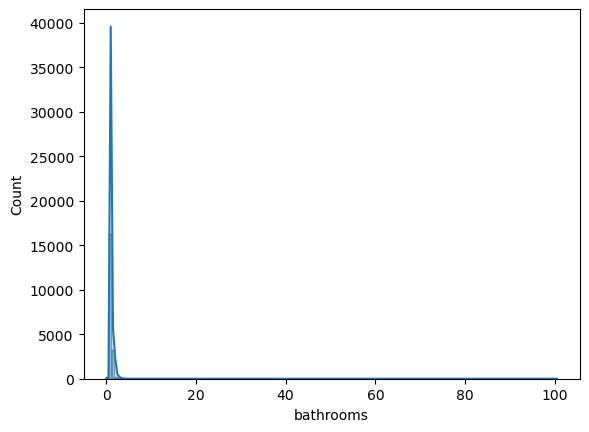

In [54]:
sns.histplot(df_listings_details['bathrooms'], bins=150, kde = True)

<Axes: xlabel='bathrooms', ylabel='Count'>

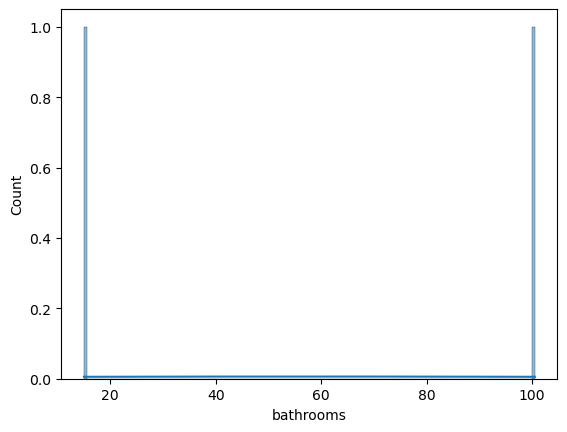

In [63]:
sns.histplot(df_listings_details['bathrooms'][df_listings_details['bathrooms']> 10], bins=150, kde = True)

In [69]:
df_listings_details['bathrooms'][df_listings_details['bathrooms']> 10]

9739     100.5
10762     15.0
Name: bathrooms, dtype: float64

After assessing current AirBnB listings in Amsterdam, I couldn't find listings with more than 12 bathrooms, so the value for 100 is definitely above reasonable counts, was probably a mistake in data collection and will be removed from the dataset

In [70]:
df_listings_details= df_listings_details[df_listings_details['bathrooms']< 100]

<Axes: xlabel='maximum_nights', ylabel='Count'>

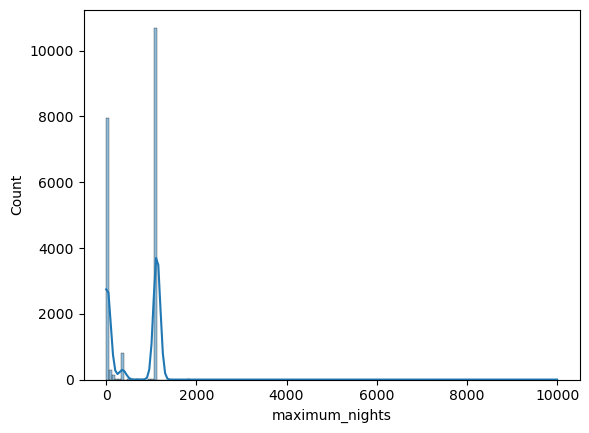

In [73]:
sns.histplot(df_listings_details['maximum_nights'], bins=150, kde = True)

<Axes: xlabel='maximum_nights', ylabel='Count'>

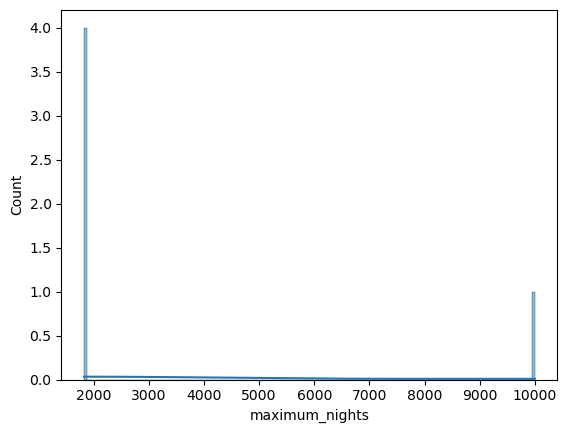

In [74]:
sns.histplot(df_listings_details['maximum_nights'][df_listings_details['maximum_nights']>1500], bins=150, kde = True)

In [68]:
df_listings_details['maximum_nights'][df_listings_details['maximum_nights']>1500]

15      1825
253     1825
388     1825
553     1825
4538    9999
Name: maximum_nights, dtype: int64

The value for 9999 nights is an outlier and should be removed, as it represents a rental period of 27 years and 144 days. Compared to the still high, but relatively more normal value of 5 years for the next lowest value. Also, the fact that there's 4 individual counts of 1825 nights may indicate that this is the maximum inputable rental value on the AirBnB platform.

In [75]:
df_listings_details = df_listings_details[df_listings_details['maximum_nights']<8000]

<Axes: xlabel='beds', ylabel='Count'>

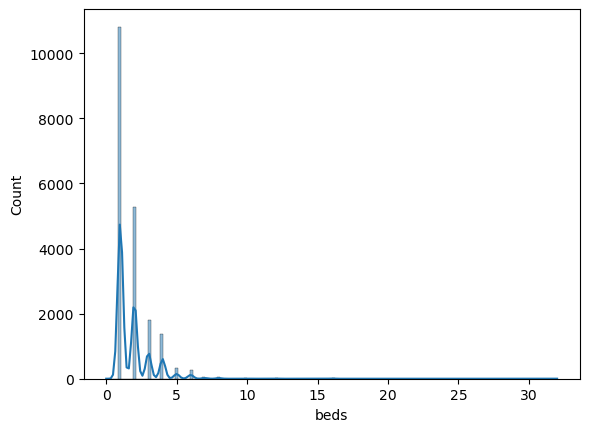

In [56]:
sns.histplot(df_listings_details['beds'], bins=150, kde = True)

<Axes: xlabel='beds', ylabel='Count'>

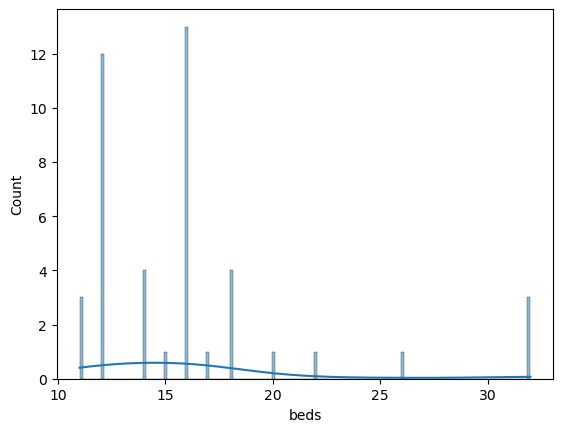

In [67]:
sns.histplot(df_listings_details['beds'][df_listings_details['beds']>10], bins=150, kde = True)

After looking at current Amsterdam AirBnB listings, there are several listings with 24+ beds, so we can assume these values are not mistakes and should stay as is

## 8. Saving Final files

In [77]:
# Saving final dataframe
df_listings_details.to_csv(os.path.join(path,'02 Data','Prepared Data', 'df_listings_details_cleaned.csv'))